In [15]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dropout, Dense
from keras.utils import np_utils
import tensorflow

In [17]:
x_data = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')

In [42]:
x_ = np.array(x_data)
x = x_[:,1:]
x = x/255.0
y = x_[:,0]

test_ = np.array(test)
x_t =  test_[:,1:]
x_t = x_t/255.0
y_t = test_[:,0]

In [43]:
#reshaping for network

x_train = x.reshape((-1,28,28,1))
y_train = np_utils.to_categorical(y)  # to create one hot notation
print(x_train.shape, y_train.shape)

x_test = x_t.reshape((-1,28,28,1))
y_test = np_utils.to_categorical(y_t)  # to create one hot notation
print(x_test.shape, y_test.shape)

(60000, 28, 28, 1) (60000, 10)
(10000, 28, 28, 1) (10000, 10)


In [28]:
#creating CNN model
model = Sequential()
model.add(Convolution2D(32,(3,3), activation = 'relu', input_shape = (28,28,1)))
model.add(Convolution2D(64,(3,3), activation = 'relu'))
model.add(Dropout(.25))
model.add(MaxPooling2D(2,2))

model.add(Convolution2D(128,(3,3), activation = 'relu'))
model.add(Convolution2D(64,(3,3), activation = 'relu'))
model.add(Dropout(.25))
model.add(MaxPooling2D(2,2))

model.add(Convolution2D(32,(2,2), activation = 'relu'))
model.add(Convolution2D(16,(2,2), activation = 'relu', data_format = 'channels_first'))
model.add(Flatten())

model.add(Dense(10,activation = 'softmax'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_13 (Dropout)         (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 10, 10, 128)       73856     
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 8, 8, 64)          73792     
_________________________________________________________________
dropout_14 (Dropout)         (None, 8, 8, 64)         

In [29]:
model.compile(loss ='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [30]:
hist = model.fit(x_train, y_train, epochs = 10, shuffle = True, batch_size = 256, validation_split = 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 68s 1ms/step - loss: 0.7709 - accuracy: 0.7106 - val_loss: 0.5663 - val_accuracy: 0.8188
Epoch 2/10
48000/48000 [==============================] - 73s 2ms/step - loss: 0.4511 - accuracy: 0.8334 - val_loss: 0.4445 - val_accuracy: 0.8596
Epoch 3/10
48000/48000 [==============================] - 65s 1ms/step - loss: 0.3696 - accuracy: 0.8659 - val_loss: 0.3907 - val_accuracy: 0.8750
Epoch 4/10
48000/48000 [==============================] - 64s 1ms/step - loss: 0.3272 - accuracy: 0.8819 - val_loss: 0.3478 - val_accuracy: 0.8869
Epoch 5/10
48000/48000 [==============================] - 64s 1ms/step - loss: 0.2897 - accuracy: 0.8945 - val_loss: 0.3170 - val_accuracy: 0.8978
Epoch 6/10
48000/48000 [==============================] - 64s 1ms/step - loss: 0.2750 - accuracy: 0.8998 - val_loss: 0.3188 - val_accuracy: 0.8980
Epoch 7/10
48000/48000 [==============================] - 66s 1ms/st

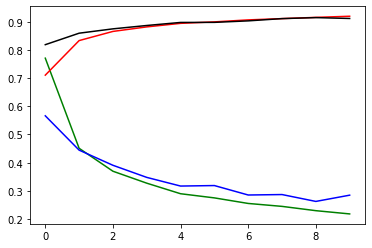

In [44]:
plt.figure(0)
plt.plot(hist.history['loss'], 'g')
plt.plot(hist.history['val_loss'], 'b')
plt.plot(hist.history['accuracy'], 'r')
plt.plot(hist.history['val_accuracy'], 'black')
plt.show()

In [45]:
hist.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [46]:
print(np.mean(hist.history['accuracy']), np.mean(hist.history['val_accuracy']))

0.873975 0.8877499997615814


In [47]:
len(hist.history['accuracy'])

10

In [48]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 3s 311us/step


[0.2774016491174698, 0.9147999882698059]